In [2]:
!dir

 Volume in drive F is Work Station
 Volume Serial Number is FC32-A8FF

 Directory of F:\Geeks for Geeks\Machine_Learning\Feature engineering

05/25/2024  05:50 PM    <DIR>          .
05/24/2024  03:51 PM    <DIR>          ..
05/25/2024  06:28 PM    <DIR>          .ipynb_checkpoints
05/25/2024  05:50 PM           267,836 Correlation_matrix.ipynb
05/22/2024  01:26 AM         1,377,274 global_heat_index.csv
               2 File(s)      1,645,110 bytes
               3 Dir(s)  489,919,987,712 bytes free


In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

In [4]:
data = pd.read_csv("global_heat_index.csv")

In [5]:
data.head(20)

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0
5,2011,1,1,5,1,8.098655,985.723206,65.278494,89.290062,1.937899,0
6,2011,1,1,6,2,7.806705,986.249146,67.093181,95.835983,1.815175,0
7,2011,1,1,7,2,9.036408,987.038940,64.035483,105.198181,1.615310,0
8,2011,1,1,8,3,12.158280,987.897400,55.105656,113.317665,1.439088,159
9,2011,1,1,9,3,14.965301,988.211914,47.166938,117.327606,1.063374,363


In [6]:
data.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000,17520.000000
mean,2011.500000,6.526027,15.720548,11.500000,11.375171,26.953731,979.699263,47.635089,182.306160,2.637895,235.047945
std,0.500014,3.447950,8.796498,6.922384,10.850196,8.417945,6.130488,26.734818,98.695757,1.244842,312.916933
min,2011.000000,1.000000,1.000000,0.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,3.000000,21.611058,974.325027,23.413340,84.141256,1.718903,0.000000
50%,2011.500000,7.000000,16.000000,11.500000,12.000000,27.455196,980.491516,46.529440,221.495407,2.564217,0.000000
75%,2012.000000,10.000000,23.000000,17.250000,22.000000,32.031030,984.943756,69.450031,250.299492,3.412514,489.250000
max,2012.000000,12.000000,31.000000,23.000000,27.000000,52.157927,993.353210,100.000000,359.989960,7.287084,1001.000000


In [7]:
clean1 = data[data["Hour"]<6]
clean2 = data[data["Hour"]>18]

In [8]:
print(clean1["Solar Radiation (GHI)"].unique())
print(clean2["Solar Radiation (GHI)"].unique())

[0]
[0]


In [9]:
data = data.drop(clean1.index,axis=0)
data = data.drop(clean2.index,axis=0)

In [10]:
data.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Dew Point', 'Temperature', 'Pressure',
       'Relative Humidity', 'Wind Direction', 'Wind Speed',
       'Solar Radiation (GHI)'],
      dtype='object')

In [11]:
data.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000
mean,2011.500000,6.526027,15.720548,12.000000,11.172603,29.843403,979.837013,41.346867,192.621930,2.404642,433.934668
std,0.500026,3.448033,8.796710,3.741855,11.204963,8.272602,6.183468,25.653292,98.401266,1.241931,307.352650
min,2011.000000,1.000000,1.000000,6.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,9.000000,2.000000,24.991642,974.409988,18.638580,98.280884,1.488960,148.000000
50%,2011.500000,7.000000,16.000000,12.000000,11.000000,30.117739,980.606934,39.359365,230.102280,2.246798,446.000000
75%,2012.000000,10.000000,23.000000,15.000000,22.000000,34.920360,985.049332,61.814032,258.325935,3.153406,693.000000
max,2012.000000,12.000000,31.000000,18.000000,27.000000,52.157927,993.353210,100.000000,359.821167,7.287084,1001.000000


In [12]:
X = data.iloc[:, 0:10]
Y = data.iloc[:, -1]

In [13]:
from sklearn.preprocessing import MinMaxScaler

X = pd.DataFrame(MinMaxScaler().fit_transform(X))

In [14]:
X.describe()

,0,1,2,3,4,5,6,7,8,9
count,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000
mean,0.500000,0.502366,0.490685,0.500000,0.712229,0.526175,0.527362,0.408012,0.535282,0.327207
std,0.500026,0.313458,0.293224,0.311821,0.203727,0.175660,0.216225,0.258920,0.273499,0.171136
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.272727,0.233333,0.250000,0.545455,0.423153,0.337588,0.178816,0.273068,0.201027
50%,0.500000,0.545455,0.500000,0.500000,0.709091,0.532000,0.554285,0.387952,0.639456,0.305456
75%,1.000000,0.818182,0.733333,0.750000,0.909091,0.633979,0.709628,0.614588,0.717902,0.430385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
corr_matrix = data.corr()

In [16]:
corr_matrix

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
Year,1.000000e+00,-1.206348e-12,-7.235267e-14,-1.408221e-15,-0.139773,0.026887,0.020252,-0.166373,0.011996,0.037455,-0.013891
Month,-1.206348e-12,1.000000e+00,1.189318e-02,2.332832e-15,0.491577,-0.038576,-0.036657,0.460993,-0.102648,-0.216902,-0.090227
Day,-7.235267e-14,1.189318e-02,1.000000e+00,2.843627e-17,-0.017772,-0.011873,0.046708,-0.005074,-0.021712,0.038542,0.011420
Hour,-1.408221e-15,2.332832e-15,2.843627e-17,1.000000e+00,-0.020686,0.269499,-0.183460,-0.211869,0.113641,0.006593,0.040573
Dew Point,-1.397731e-01,4.915774e-01,-1.777210e-02,-2.068626e-02,1.000000,0.198330,-0.587488,0.790023,0.160133,0.072254,-0.024650
Temperature,2.688710e-02,-3.857553e-02,-1.187262e-02,2.694991e-01,0.198330,1.000000,-0.627170,-0.344609,0.431627,0.263510,0.608713
Pressure,2.025241e-02,-3.665724e-02,4.670753e-02,-1.834597e-01,-0.587488,-0.627170,1.000000,-0.244693,-0.428785,-0.435057,-0.144057
Relative Humidity,-1.663735e-01,4.609927e-01,-5.073932e-03,-2.118687e-01,0.790023,-0.344609,-0.244693,1.000000,-0.053618,-0.107921,-0.371410
Wind Direction,1.199631e-02,-1.026477e-01,-2.171216e-02,1.136411e-01,0.160133,0.431627,-0.428785,-0.053618,1.000000,0.207285,0.168475
Wind Speed,3.745498e-02,-2.169017e-01,3.854214e-02,6.593433e-03,0.072254,0.263510,-0.435057,-0.107921,0.207285,1.000000,0.007935


<Axes: >

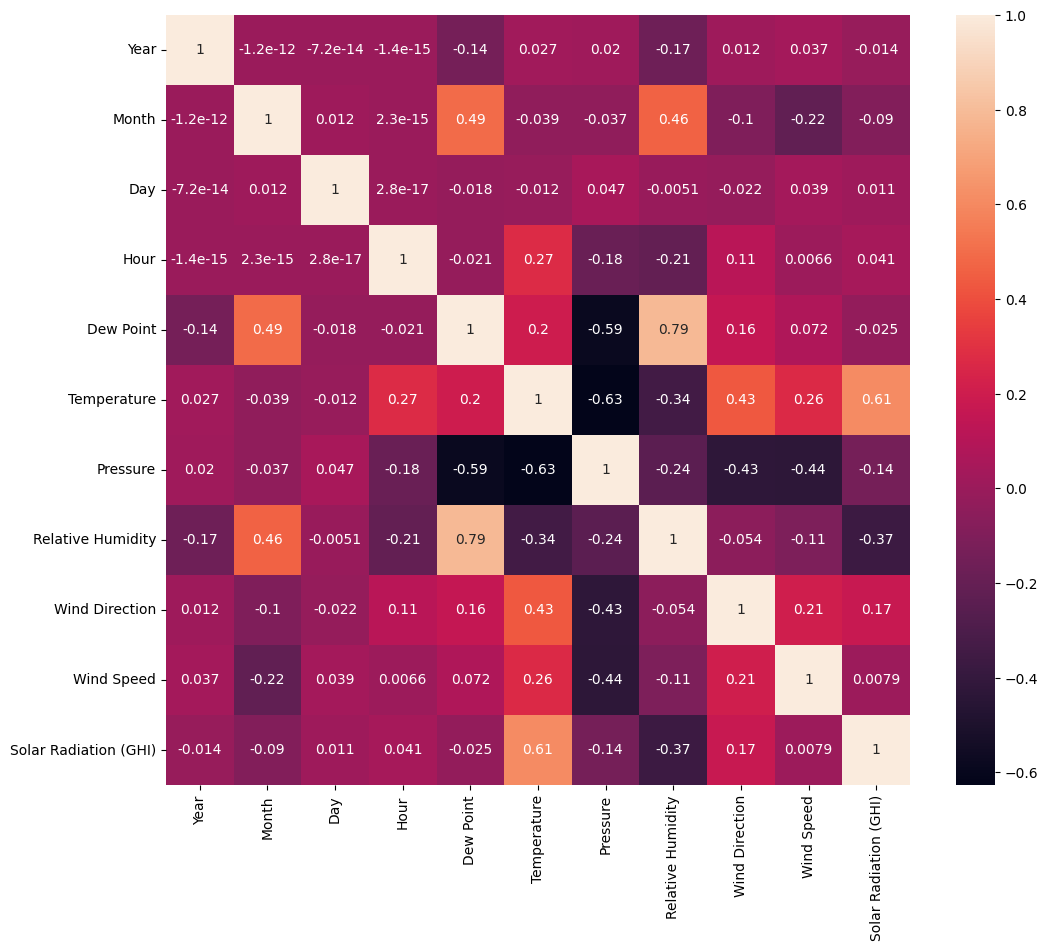

In [17]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot= True)

In [18]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, Y)

ExtraTreesClassifier()

In [19]:
X

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.000000,0.545455,0.058249,0.751583,0.667870,0.266273,0.245979
1,0.0,0.0,0.0,0.083333,0.545455,0.084360,0.779201,0.637009,0.292294,0.218438
2,0.0,0.0,0.0,0.166667,0.563636,0.150650,0.809220,0.546880,0.314862,0.194155
3,0.0,0.0,0.0,0.250000,0.563636,0.210254,0.820218,0.466754,0.326007,0.142382
4,0.0,0.0,0.0,0.333333,0.563636,0.294994,0.814713,0.361586,0.201380,0.071046
...,...,...,...,...,...,...,...,...,...,...
9485,1.0,1.0,1.0,0.666667,0.363636,0.406748,0.661102,0.095294,0.015946,0.249092
9486,1.0,1.0,1.0,0.750000,0.345455,0.374816,0.654829,0.104142,0.023550,0.262867
9487,1.0,1.0,1.0,0.833333,0.381818,0.316482,0.661057,0.141926,0.048566,0.297785
9488,1.0,1.0,1.0,0.916667,0.418182,0.247227,0.664845,0.208352,0.081641,0.364545


In [20]:
col = data.iloc[:, :-1].columns.tolist()
print(col)
imp_features = pd.Series(model.feature_importances_,index= col)
imp_features

['Year', 'Month', 'Day', 'Hour', 'Dew Point', 'Temperature', 'Pressure', 'Relative Humidity', 'Wind Direction', 'Wind Speed']


Year                 0.027019
Month                0.044114
Day                  0.109200
Hour                 0.111803
Dew Point            0.087999
Temperature          0.138474
Pressure             0.123922
Relative Humidity    0.123662
Wind Direction       0.116497
Wind Speed           0.117311
dtype: float64

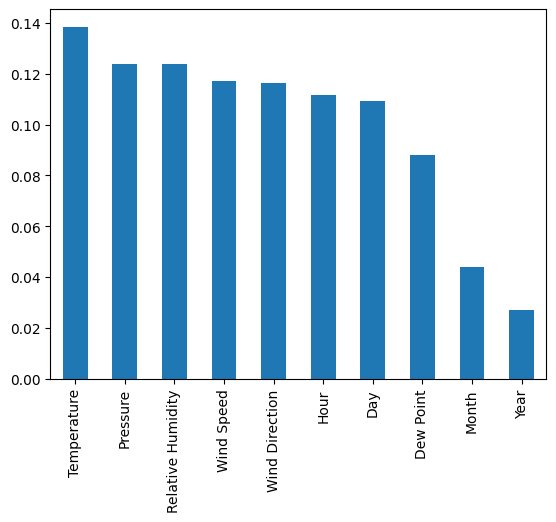

In [21]:
imp_features.nlargest(10).plot(kind = "bar")
plt.show()

# SelectKBest Method 

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 

In [23]:
best_feature = SelectKBest(score_func = chi2, k=10).fit(X,Y)

In [27]:
scores = pd.DataFrame(best_feature.scores_)
columns = pd.DataFrame(col)

In [34]:
feature_score = pd.concat([columns,scores], axis=1)
feature_score.columns = ['Features','Scores']

In [35]:
feature_score

,Features,Scores
0,Year,504.976721
1,Month,236.303859
2,Day,208.497847
3,Hour,271.978728
4,Dew Point,74.952667
5,Temperature,306.062548
6,Pressure,213.040872
7,Relative Humidity,397.828591
8,Wind Direction,221.823327
9,Wind Speed,148.735716


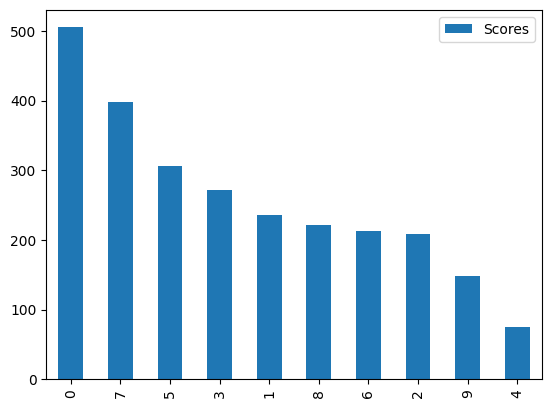

In [40]:
feature_score.nlargest(10, "Scores").plot(kind = "bar")
plt.show()